In [1]:
# dataset0 = dataset0[dataset0['Dust_gap_1']>0.05] ## filtering out very narrow gaps
# dataset = dataset[dataset['#_DG'] <= 2] # keeping one and two dust gap disks

In [16]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import matplotlib as mpl
from sklearn.utils import shuffle

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

import numpy as np

In [17]:
#!mkdir -p data_folder


In [18]:

dataset = pd.read_csv('data_folder/dataset_filered.csv',index_col=0) 
dataset = dataset.drop(columns=['Gas_gap_1','Dust_depth_1','Dust_depth_2','Gas_depth_1','#_DG', '#_GG']) 
dataset

,Planet_Mass,Epsilon,Alpha,Stokes,Aspect_Ratio,SigmaSlope,Dust_gap_1,Dust_gap_2
0,43.666667,0.0589,0.00174,0.00112,0.0593,0.971,0.345,0.000
1,103.000000,0.0558,0.00467,0.08630,0.0452,0.946,0.845,0.000
2,16.633333,0.0691,0.00989,0.04200,0.0392,0.538,0.074,0.000
3,38.000000,0.0762,0.00694,0.05240,0.0263,1.310,0.718,0.000
4,75.666667,0.0219,0.00151,0.06840,0.0508,1.290,0.878,0.000
...,...,...,...,...,...,...,...,...
783,61.666667,0.0340,0.00156,0.08570,0.0469,1.250,0.857,0.000
784,97.333333,0.0421,0.00348,0.05410,0.0726,1.080,0.681,0.098
785,79.000000,0.0429,0.00830,0.05580,0.0683,1.030,0.103,0.000
786,12.333333,0.0579,0.00354,0.07920,0.0368,0.849,0.677,0.000


In [19]:
dataset.isna().sum()
dataset = dataset.dropna()
dataset

,Planet_Mass,Epsilon,Alpha,Stokes,Aspect_Ratio,SigmaSlope,Dust_gap_1,Dust_gap_2
0,43.666667,0.0589,0.00174,0.00112,0.0593,0.971,0.345,0.000
1,103.000000,0.0558,0.00467,0.08630,0.0452,0.946,0.845,0.000
2,16.633333,0.0691,0.00989,0.04200,0.0392,0.538,0.074,0.000
3,38.000000,0.0762,0.00694,0.05240,0.0263,1.310,0.718,0.000
4,75.666667,0.0219,0.00151,0.06840,0.0508,1.290,0.878,0.000
...,...,...,...,...,...,...,...,...
783,61.666667,0.0340,0.00156,0.08570,0.0469,1.250,0.857,0.000
784,97.333333,0.0421,0.00348,0.05410,0.0726,1.080,0.681,0.098
785,79.000000,0.0429,0.00830,0.05580,0.0683,1.030,0.103,0.000
786,12.333333,0.0579,0.00354,0.07920,0.0368,0.849,0.677,0.000


In [20]:
randomState = 0
train_dataset = dataset.sample(frac = 0.8,random_state=randomState)
test_dataset = dataset.drop(train_dataset.index)

test_dataset.to_csv('test_dataset.csv')
train_dataset.to_csv('train_dataset.csv')

train_dataset

,Planet_Mass,Epsilon,Alpha,Stokes,Aspect_Ratio,SigmaSlope,Dust_gap_1,Dust_gap_2
383,93.666667,0.0149,0.00517,0.0254,0.0267,0.577,0.796,0.0
489,25.133333,0.0307,0.00288,0.0913,0.0362,0.735,0.751,0.0
352,114.666667,0.0316,0.00522,0.0210,0.0743,0.803,0.689,0.0
14,117.333333,0.0404,0.00181,0.0648,0.0718,0.880,0.935,0.0
146,111.666667,0.0656,0.00344,0.0287,0.0859,1.490,0.103,0.0
...,...,...,...,...,...,...,...,...
25,69.333333,0.0166,0.00842,0.0504,0.0632,0.598,0.111,0.0
110,28.200000,0.0150,0.00285,0.0643,0.0512,0.712,0.710,0.0
150,96.333333,0.0590,0.00940,0.0129,0.0280,0.826,0.726,0.0
153,77.000000,0.0808,0.00103,0.0447,0.0753,1.070,0.800,0.0


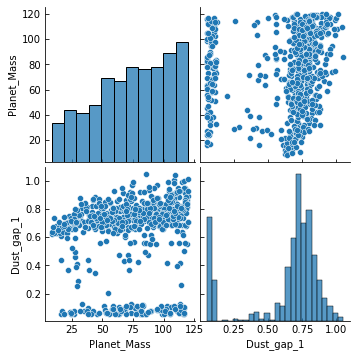

In [21]:
sns.pairplot(train_dataset[["Planet_Mass","Dust_gap_1"]],diag_kind ="hist")

In [8]:
train_stats = train_dataset.describe()
train_stats.pop("Planet_Mass")
train_stats = train_stats.transpose()
train_stats.to_csv('data_folder/train_stats.csv')
train_stats

,count,mean,std,min,25%,50%,75%,max
Epsilon,626.0,0.055831,0.025991,0.010000,0.032950,0.055450,0.078850,0.10000
Alpha,626.0,0.004860,0.002883,0.000104,0.002345,0.004735,0.007392,0.00999
Stokes,626.0,0.049890,0.027891,0.001120,0.026325,0.049200,0.073075,0.09990
Aspect_Ratio,626.0,0.053632,0.018723,0.025000,0.037825,0.050850,0.068075,0.09940
SigmaSlope,626.0,0.997016,0.296002,0.500000,0.740000,0.991000,1.260000,1.50000
Dust_gap_1,626.0,0.632230,0.270333,0.053000,0.632000,0.726000,0.800000,1.05000
Dust_gap_2,626.0,0.013118,0.068329,0.000000,0.000000,0.000000,0.000000,0.83700


In [9]:
test_labels = test_dataset.pop("Planet_Mass")
train_labels = train_dataset.pop("Planet_Mass")
print(train_labels)

383     93.666667
489     25.133333
352    114.666667
14     117.333333
146    111.666667
          ...    
25      69.333333
110     28.200000
150     96.333333
153     77.000000
530     81.000000
Name: Planet_Mass, Length: 626, dtype: float64


In [10]:
def norm(x):
     return(x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data

,Epsilon,Alpha,Stokes,Aspect_Ratio,SigmaSlope,Dust_gap_1,Dust_gap_2
383,-1.574820,0.107506,-0.878054,-1.438431,-1.418964,0.605809,-0.191985
489,-0.966908,-0.686796,1.484732,-0.931041,-0.885184,0.439348,-0.191985
352,-0.932280,0.124848,-1.035812,1.103862,-0.655455,0.210000,-0.191985
14,-0.593696,-1.057932,0.534598,0.970338,-0.395322,1.119991,-0.191985
146,0.375886,-0.492556,-0.759736,1.723413,1.665477,-1.957699,-0.191985
...,...,...,...,...,...,...,...
25,-1.509412,1.234789,0.018299,0.511017,-1.348019,-1.928106,-0.191985
110,-1.570973,-0.697201,0.516671,-0.129898,-0.962886,0.287683,-0.191985
150,0.121948,1.574709,-1.326231,-1.368999,-0.577753,0.346869,-0.191985
153,0.960713,-1.328480,-0.186070,1.157272,0.246566,0.620606,-0.191985


In [11]:
def build_model():
    model = keras.Sequential([
        layers.Dense(256, activation=tf.nn.relu,kernel_regularizer=regularizers.l2(0.0001),input_shape=[len(train_dataset.keys())]),
        layers.Dense(128, activation=tf.nn.relu,kernel_regularizer=regularizers.l2(0.0001)),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.0001)
    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
    return model
model = build_model()
model.summary()
    
    
    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 35,073
Trainable params: 35,073
Non-trainable params: 0
_________________________________________________________________


In [12]:
example_batch = normed_train_data[:10]
example_batch

,Epsilon,Alpha,Stokes,Aspect_Ratio,SigmaSlope,Dust_gap_1,Dust_gap_2
383,-1.574820,0.107506,-0.878054,-1.438431,-1.418964,0.605809,-0.191985
489,-0.966908,-0.686796,1.484732,-0.931041,-0.885184,0.439348,-0.191985
352,-0.932280,0.124848,-1.035812,1.103862,-0.655455,0.210000,-0.191985
14,-0.593696,-1.057932,0.534598,0.970338,-0.395322,1.119991,-0.191985
146,0.375886,-0.492556,-0.759736,1.723413,1.665477,-1.957699,-0.191985
423,-0.351301,-0.294848,-0.738223,-0.690698,0.347917,0.591013,-0.191985
758,-1.520954,-0.794321,-1.071667,-0.909677,0.820887,0.742678,-0.191985
254,-1.270864,-1.106492,-1.553187,1.563184,0.314133,0.513330,-0.191985
176,0.075777,-0.263631,1.205070,-0.770812,-0.385187,0.709385,-0.191985
232,-1.717179,0.867121,-1.603383,-0.145921,1.361424,-1.913310,-0.191985


In [13]:
result = model.predict(example_batch)
print(result[:,0])

[-0.01865199 -0.03057192 -0.18067797 -0.03421566 -0.12025531 -0.0746141
 -0.22220078 -0.23267305  0.09078987 -0.26500678]


In [14]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 2000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [15]:

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
1995,80.283562,6.414766,80.193130,198.049133,10.119150,197.958679,1995
1996,80.313332,6.433864,80.222847,197.822861,10.100225,197.732361,1996
1997,80.160576,6.430624,80.070076,198.246979,10.128578,198.156479,1997
1998,80.012772,6.415934,79.922256,198.531250,10.139894,198.440720,1998
1999,80.072723,6.405952,79.982185,198.165680,10.126204,198.075119,1999
